# Logistic Regression

While linear regression predicts continuous outcomes, logistic regression is used when the outcome is categorical, often binary. It models the probability between 0 and 1 that a given input belongs to a particular category. This probability is then used to classify the input into one of the two categories. This sort of tasks is called classification. 

Consider a classification problem where we are given samples $(\boldsymbol x_i, y_i)_{i=1}^n$ for $\boldsymbol x_i=(1, \boldsymbol x_{i,1}, \cdots, \boldsymbol x_{i,m})$ and $y_i\in\{0,1\}$ (binary classification). In this setting, we cannot naively apply linear regression as the outcomes are not continuously distributed. It is hard to interpret the regression coefficients $\boldsymbol \beta$.

### The Logistic Function

Instead of directly modelling $Y$ as a function of $X$ directly, we model the probability of $Y$ being equal to 1 or 0. Let $\boldsymbol x_i$ denote the conditional probability of having the output 1 given an input $\boldsymbol x_i$, i.e. $p(\boldsymbol x_i) = P(y_i=1\mid \boldsymbol x_i)$. We express the logistic model as:

$$
\begin{align}
p(\boldsymbol x_i) = \frac{\exp(\boldsymbol\beta^T \boldsymbol x_i^)}{1+\exp(\boldsymbol\beta^T\boldsymbol x_i^T)}
\end{align}
$$

where the function on the right-hand side is called the sigmoid function of $\boldsymbol\beta^T\boldsymbol x_i$, satisfying the following properties:
- $f(x)$ has horizontal asymptotes as $x\to\pm\infty$.
- $f(x)$ has a non-negative derivative for all $x\in\mathbb R$.
- $f(x)$ has exactly one inflection point.
- $f(x)$ is monotonic.

We can arrange the above equation and obtain

$$
\begin{align}
\log\left( \frac{p(\boldsymbol x_i)}{1-p(\boldsymbol x_i)} \right)=\boldsymbol \beta^T\boldsymbol x_i
\end{align}
$$

We then have

$$
\begin{align}
\frac{p(\boldsymbol x_i)}{1-p(\boldsymbol x_i)}=\exp(\boldsymbol \beta^T\boldsymbol x_i)=\exp(\beta_0+\beta_1 x_{i,1}+\cdots+\beta_m x_{i,m})
\\
\implies \log\left( \frac{p(\boldsymbol x_i)}{1-p(\boldsymbol x_i)} \right)=\boldsymbol \beta^T\boldsymbol x_i = \beta_0 + \beta_1 x_{i,1} + \cdots + \beta_m x_{i,m}
\end{align}
$$

meaning that increasing $x_{i,j}$ by one unit, while keeping all other predictors fixed, changes the log odds by $\beta_j$.

### Decision Boundary

Suppose we estimated $\boldsymbol \beta$ by $\boldsymbol{\hat\beta}$. We then have

$$
\begin{align}
\hat p(\boldsymbol x_i) = \frac{\exp(\hat{\boldsymbol \beta}^T\boldsymbol x_i)}{1+\exp(\hat{\boldsymbol \beta}^T\boldsymbol x_i)}
\end{align}
$$

and then we predict the class $\hat y_i$ as the following:

$$
\begin{align}
    \hat y_i = 
    \begin{cases} 
        0 & \text{if } \hat p(\boldsymbol x_i)\leq 0.5 \\
        1 & \text{if } \hat p(\boldsymbol x_i) > 0.5
    \end{cases}
\end{align}
$$

or equivalently

$$
\begin{align}
    \hat y_i = 
    \begin{cases} 
        0 & \text{if } \hat{\boldsymbol\beta}^T\boldsymbol x_i \leq 0 \\
        1 & \text{if } \hat{\boldsymbol\beta}^T\boldsymbol x_i > 0
    \end{cases}
\end{align}
$$

### Multinomial Regression

When we have more than two classes, we simply extend to the multinomial model. Given $K$ classes for the outcome $y_i$, we have

$$
\begin{gather}
\hat p_1(\boldsymbol x_i) = P(y_i = 1\mid \boldsymbol x_i) = \frac{\exp(\boldsymbol \beta_1^T \boldsymbol x_i)}{1 + \sum_{j=1}^{K-1}\exp(\boldsymbol \beta_j^T\boldsymbol x_i)} \\
\hat p_2(\boldsymbol x_i) = P(y_i = 2\mid \boldsymbol x_i) = \frac{\exp(\boldsymbol \beta_2^T \boldsymbol x_i)}{1 + \sum_{j=1}^{K-1}\exp(\boldsymbol \beta_j^T\boldsymbol x_i)} \\
\vdots \\
\hat p_{K-1}(\boldsymbol x_i) = P(y_i = K-1 \mid \boldsymbol x_i) = \frac{\exp(\boldsymbol \beta_{K-1}^T \boldsymbol x_i)}{1 + \sum_{j=1}^{K-1}\exp(\boldsymbol \beta_j^T\boldsymbol x_i)} \\
\hat p_K(\boldsymbol x_i) = P(y_i = K\mid \boldsymbol x_i) = \frac{1}{1 + \sum_{j=1}^{K-1}\exp(\boldsymbol \beta_j^T\boldsymbol x_i)}
\end{gather}
$$

and we predict the class according to

$$
\begin{align}
\hat y_i = \arg\max_j \hat p_j(\boldsymbol x_i)
\end{align}
$$

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [8]:
# Import the dataset

breast_cancer = load_breast_cancer()

print(f"Feature names: {breast_cancer.feature_names}")
print(f"Target names: {breast_cancer.target_names}")

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [9]:
# Divide the data into the training and the test set

X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3817)

In [10]:
# Define and fit the model

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/fredjeong/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9736842105263158


<Axes: >

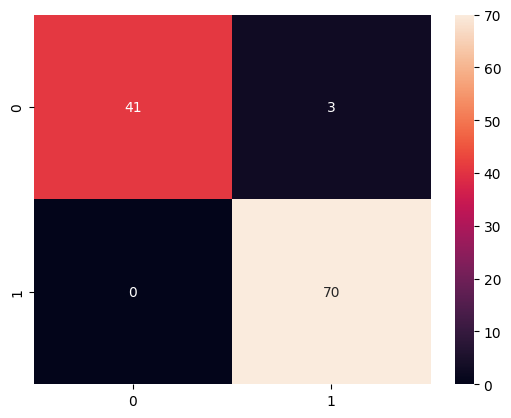

In [13]:
# Evaluate the model

print(f"Accuracy: {model.score(X_test, y_test)}")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
sns.heatmap(confusion_matrix, annot=True)
